## Python import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [11]:
#gpu 사용확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5130640676813463624
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11204608683023282173
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4273059362391203620
physical_device_desc: "device: XLA_GPU device"
]


## Load Data

In [13]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## EDA

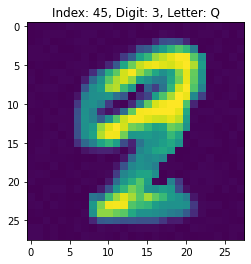

In [14]:
idx = 45
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## Train model

In [15]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [17]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [18]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
64/64 [==============================] - 17s 270ms/step - loss: 2.7465 - accuracy: 0.4351
Epoch 2/100
64/64 [==============================] - 18s 283ms/step - loss: 0.9205 - accuracy: 0.6919
Epoch 3/100
64/64 [==============================] - 17s 269ms/step - loss: 0.5056 - accuracy: 0.8350
Epoch 4/100
64/64 [==============================] - 17s 272ms/step - loss: 0.3190 - accuracy: 0.8916
Epoch 5/100
64/64 [==============================] - 17s 273ms/step - loss: 0.2449 - accuracy: 0.9131
Epoch 6/100
64/64 [==============================] - 17s 273ms/step - loss: 0.1480 - accuracy: 0.9507
Epoch 7/100
64/64 [==============================] - 18s 276ms/step - loss: 0.1129 - accuracy: 0.9634
Epoch 8/100
64/64 [==============================] - 17s 273ms/step - loss: 0.0761 - accuracy: 0.9775
Epoch 9/100
64/64 [==============================] - 18s 275ms/step - loss: 0.0554 - accuracy: 0.9839
Epoch 10/100
64/64 [==============================] - 17s 271ms/step - loss: 0.043

64/64 [==============================] - 17s 273ms/step - loss: 1.4876e-04 - accuracy: 1.0000
Epoch 80/100
64/64 [==============================] - 18s 275ms/step - loss: 2.3704e-04 - accuracy: 1.0000
Epoch 81/100
64/64 [==============================] - 18s 278ms/step - loss: 1.3274e-04 - accuracy: 1.0000
Epoch 82/100
64/64 [==============================] - 18s 275ms/step - loss: 2.2699e-04 - accuracy: 1.0000
Epoch 83/100
64/64 [==============================] - 18s 276ms/step - loss: 1.5391e-04 - accuracy: 1.0000
Epoch 84/100
64/64 [==============================] - 17s 272ms/step - loss: 1.3580e-04 - accuracy: 1.0000
Epoch 85/100
64/64 [==============================] - 18s 276ms/step - loss: 6.8815e-05 - accuracy: 1.0000
Epoch 86/100
64/64 [==============================] - 17s 271ms/step - loss: 1.0677e-04 - accuracy: 1.0000
Epoch 87/100
64/64 [==============================] - 17s 272ms/step - loss: 2.4924e-04 - accuracy: 1.0000
Epoch 88/100
64/64 [==============================

## Predict

In [19]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3


In [20]:
submission.to_csv('baseline_epoch100.csv', index=False)